In [207]:
# data
import pandas as pd
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
color = sns.color_palette()

# machine learning
import tensorflow as tf
#from tensorflow.contrib.layers import fully_connected, batch_norm, dropout
#from tensorflow.contrib.framework import arg_scope
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.utils import shuffle
#from sklearn.svm import LinearSVC
#from sklearn.linear_model import SGDClassifier

# keras
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.utils.layer_utils import print_summary


# tqdm
from tqdm import tqdm_notebook as tqdm

np.random.seed(7)
tf.set_random_seed(777)  # reproducibility

# layers
from tensorflow.contrib.layers import fully_connected, batch_norm, dropout
from tensorflow.contrib.framework import arg_scope

#miscellaneous
import random
import os, gc, psutil
process = psutil.Process(os.getpid())
import warnings
warnings.filterwarnings('ignore')
import operator
import json
from pprint import pprint
from xml.etree.ElementTree import parse
import datetime
import re
import math

import requests

In [73]:
# utility functions
def getTimeStamp(fileName):
    startDate = file.split('.')[0][:4]
    endDate = file.split('.')[0][4:8]
    
    return datetime.datetime.strptime(startDate, timeformat)

| No | 출력명   | 출력설명                    |
|----|----------|-----------------------------|
| 1  | DMOBSCD  | 댐 관측소 코드              |
| 2  | OBSNM    | 댐 관측소 명칭              |
| 3  | AGCNM    | 관할 기관                   |
| 4  | ADDR     | 주소                        |
| 5  | ETCADDR  | 나머지 주소                 |
| 6  | LON      | 경도(000-00-00, 세계측지계) |
| 7  | LAT      | 위도(000-00-00, 세계측지계) |
| 8  | PFH      | 계획홍수위(단위:m)          |
| 9  | FLDLMTWL | 제한수위 (El.m)             |

In [84]:
dam_df = pd.read_json('data/daminfo.json', orient='records')
dam_df = dam_df.replace('', 'null')
cols = ['dmobscd', 'obsnm', 'agcnm', 'addr', 'etcaddr', 'lon', 'lat', 'pfh', 'fldlmtwl']
dam_df = dam_df[cols]

dam_df

,dmobscd,obsnm,agcnm,addr,etcaddr,lon,lat,pfh,fldlmtwl
0,1003110,충주댐,한국수자원공사,충청북도 충주시,종민동,127-59-44,37-00-13,145,138
1,1003611,충주조정지댐,한국수자원공사,충청북도 충주시,가금면 장천리,127-52-00,37-02-41,67.3,null
2,1004310,괴산댐,한국수력원자력,충청북도 괴산군,칠성면 산막이옛길 43,127-50-42,36-45-45,136.93,134
3,1006110,횡성댐,한국수자원공사,강원도 횡성군,갑천면 대관대리,128-01-57,37-32-42,180,178.2
4,1009710,평화의댐,한국수자원공사,강원도 화천군,화천읍 수하리,127-50-55,38-12-43,264.6,null
5,1010310,화천댐,한국수력원자력,강원도 화천군,간동면 어룡동길 42,127-47-00,38-07-00,183,175
6,1010320,춘천댐,한국수력원자력,강원도 춘천시,신북읍 영서로 3741,127-40-15,37-58-00,104.9,102
7,1012110,소양강댐,한국수자원공사,강원도 춘천시,동면 월곡리,127-48-44,37-56-46,198,190.3
8,1013310,의암댐,한국수력원자력,강원도 춘천시,신동면 옛경춘로 62-15,127-41-22,37-50-08,73.36,70.5
9,1015310,청평댐,한국수력원자력,경기도 가평군,설악면 유명로 2630,127-25-28,37-43-15,52,50


| No | 출력명  | 출력설명                 |
|----|---------|--------------------------|
| 1  | DMOBSCD | 댐 관측소 코드           |
| 2  | YMDHM   | 년월일시분(yyyyMMddHHmm) |
| 3  | SWL     | 현재수위(단위:El.m)      |
| 4  | INF     | 유입량(단위:m^3/s)       |
| 5  | SFW     | 저수량(단위:만m^3)       |
| 6  | ECPC    | 공용량(단위:백만m^3)     |
| 7  | TOTOTF  | 총 방류량(단위:m^3/s)    |

In [234]:
# chungju-dam data(16.07.01 00:00 ~ 17.08.31 23:40)
def dam_data_load(damDir, startYM, endYM, columns=['dmobscd', 'ymdhm', 'swl','inf', 'sfw', 'ecpc', 'tototf']):
    timeformat = '%y%m'
    res_df = pd.DataFrame(columns=columns)
    damFiles = sorted([name for name in os.listdir(damDir) if os.path.isfile(os.path.join(damDir, name))], key=getTimeStamp)
    
    startYM = datetime.datetime.strptime(startYM, timeformat)
    endYM = datetime.datetime.strptime(endYM, timeformat)
    
    for file in damFiles:
        fileStartYM = datetime.datetime.strptime(file.split('.')[0][:4], timeformat)
        fileEndYM = datetime.datetime.strptime(file.split('.')[0][4:8], timeformat)
        
        if (startYM <= fileStartYM and fileEndYM <= endYM):
            fileName = damDir + file
            file_df = pd.read_json(damDir + file, orient='records')
            file_df = file_df.reindex(index=file_df.index[::-1])
            res_df = pd.concat([res_df, file_df]).reset_index(drop=True)
        
    res_df.drop_duplicates(subset=['ymdhm'], keep=False)
    
    return res_df

def dam_data_make(damInfo, damData, mergeCols=['dmobscd', 'pfh', 'fldlmtwl']):
    merge_df = pd.merge(damData, damInfo[mergeCols], on='dmobscd')
    
    # drop unnecessary columns
    merge_df = merge_df.drop(['dmobscd', 'sfw'], axis=1)
    
    # make new columns
    #merge_df['fldlmtwl'] = merge_df['fldlmtwl'].astype(float)
    #merge_df['isOverFLDLMTWL'] = merge_df.apply(lambda row : 1 if row.swl > row.fldlmtwl else 0, axis=1)

    # drop columns that already used
    merge_df = merge_df.drop(['pfh', 'fldlmtwl'], axis=1)
    
    # drop outliers
    merge_df = merge_df.drop(merge_df[merge_df['swl'] < 10].index, axis=0)

    #cols = ['ymdhm', 'swl', 'inf', 'ecpc', 'tototf', 'isOverFLDLMTWL']
    cols = ['swl', 'inf', 'ecpc', 'tototf']
    
    
    return merge_df[cols]
    
chungju_df = dam_data_make(dam_df, dam_data_load('data/dams/chungju/', '1607', '1709'))

chungju_df

,swl,inf,ecpc,tototf
0,119.16,0.00,1815.46,0.00
1,119.17,0.00,1815.00,0.00
2,119.18,501.72,1814.55,0.00
3,119.18,250.89,1814.55,0.00
4,119.18,250.89,1814.55,0.00
5,119.18,0.00,1814.55,0.00
6,119.18,0.00,1814.55,0.00
7,119.18,0.00,1814.55,0.00
8,119.18,0.00,1814.55,0.00
9,119.18,0.00,1814.55,0.00


In [235]:
chungju_df[chungju_df['swl'] == 0] 

,swl,inf,ecpc,tototf


In [188]:
def create_dataset(dataset, colNum, lookBack=1):
    dataX, dataY = [], []
    
    for i in range(len(dataset) - lookBack - 1):
        a = dataset[i:(i + lookBack)].values
        dataX.append(a)
        b = dataset[i + lookBack: i + lookBack + 1].values
        dataY.append(b)
        
    return np.array(dataX).reshape((-1, colNum)), np.array(dataY).reshape((-1, colNum))

In [194]:
train_size = int(len(chungju_df) * 0.90)
test_size = len(chungju_df) - train_size
train, test = chungju_df[0:train_size], chungju_df[train_size: len(chungju_df)]

# reshape into X=t and Y=t+1
lookBack = 1
trainX, trainY = create_dataset(train, 4)
testX, testY = create_dataset(test, 4)

In [195]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0,1))
trainX = scaler.fit_transform(trainX)
trainY, testX, testY = scaler.transform(trainY), scaler.transform(testX), scaler.transform(testY)

In [197]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

trainX.shape, trainY.shape, testX.shape, testY.shape

((55349, 1, 4), (55349, 4), (6149, 1, 4), (6149, 4))

In [202]:
model = Sequential()
model.add(LSTM(16, input_shape=(1, 4)))
model.add(Dense(4))
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 16)                1344      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 68        
Total params: 1,412
Trainable params: 1,412
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
375s - loss: 0.0014
Epoch 2/100
371s - loss: 7.7057e-04
Epoch 3/100
376s - loss: 7.6515e-04
Epoch 4/100
382s - loss: 7.5740e-04
Epoch 5/100
383s - loss: 7.5647e-04
Epoch 6/100
380s - loss: 7.4974e-04
Epoch 7/100
374s - loss: 7.5365e-04
Epoch 8/100
381s - loss: 7.4416e-04
Epoch 9/100
371s - loss: 7.3973e-04
Epoch 10/100
372s - loss: 7.3811e-04
Epoch 11/100
371s - loss: 7.3673e-04
Epoch 12/100
381s - loss: 7.3441e-04
Epoch 13/100
373s - loss: 7.3258e-04
Epoch 14/100
389s - loss: 7.3214e-04
Epoch 15/100
372s - loss: 7.307

In [204]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

trainPredict = scaler.inverse_transform(trainPredict)
testPredict = scaler.inverse_transform(testPredict)

In [205]:
trainY = scaler.inverse_transform(trainY)
testY = scaler.inverse_transform(testY)

trainY

array([[  119.17,     0.  ,  1815.  ,     0.  ],
       [  119.18,   501.72,  1814.55,     0.  ],
       [  119.18,   250.89,  1814.55,     0.  ],
       ..., 
       [  137.4 ,   449.22,   671.35,     0.  ],
       [  137.4 ,   449.22,   671.35,     0.  ],
       [  137.4 ,   449.22,   671.35,     0.  ]])

In [208]:
trainScore = math.sqrt(mean_squared_error(trainY[:, 0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))

testScore = math.sqrt(mean_squared_error(testY[:, 0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.72 RMSE
Test Score: 3.45 RMSE


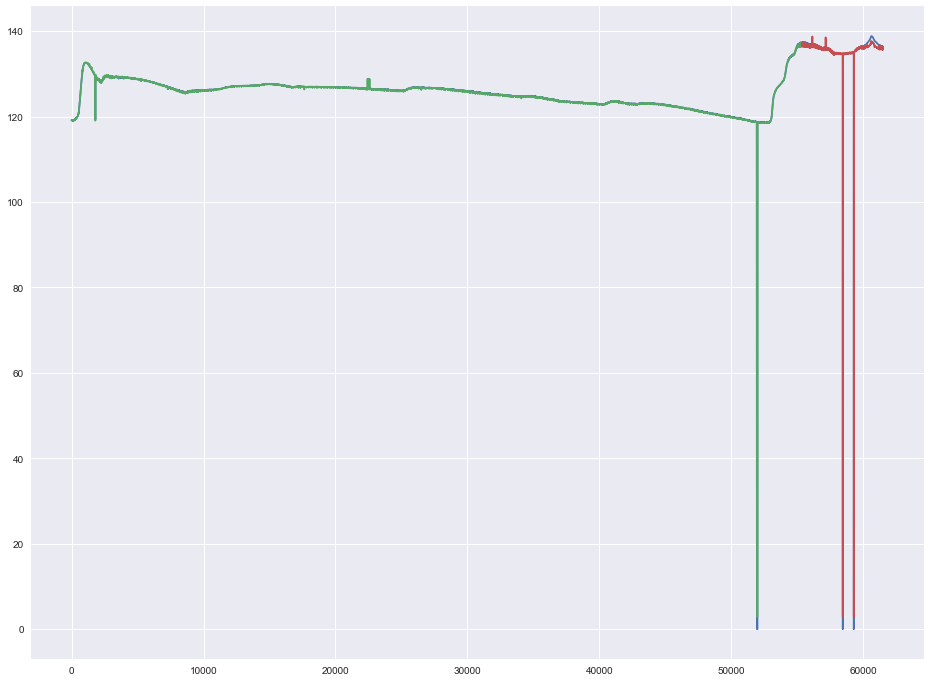

In [209]:
trainPredictPlot = np.empty_like(chungju_df['swl'])
trainPredictPlot[:] = np.nan
trainPredictPlot[lookBack:len(trainPredict[:, 0]) + lookBack] = trainPredict[:, 0]

testPredictPlot = np.empty_like(chungju_df['swl'])
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict[:, 0]) + (lookBack*2)+1:len(chungju_df['swl']) - 1] = testPredict[:, 0]

plt.subplots(1, 1, figsize=(16, 12))
plt.plot(chungju_df['swl'])
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

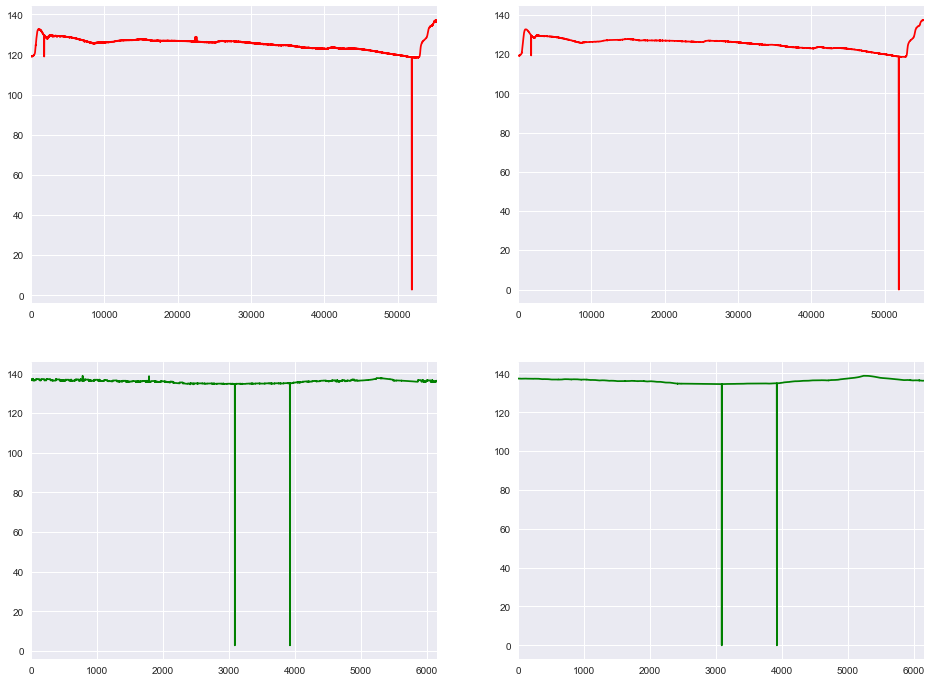

In [210]:
trP = pd.Series(trainPredict[:, 0])
trY = pd.Series(trainY[:, 0])
teP = pd.Series(testPredict[:, 0])
teY = pd.Series(testY[:, 0])

f, axes = plt.subplots(2, 2, figsize=(16, 12))
trP.plot(ax=axes[0, 0], color='red')
trY.plot(ax=axes[0, 1], color='red')
teP.plot(ax=axes[1, 0], color='green')
teY.plot(ax=axes[1, 1], color='green')

In [259]:
chungju_df.columns.values.where(this = 'swl')

AttributeError: 'numpy.ndarray' object has no attribute 'where'